<a href="https://colab.research.google.com/github/noble-man/tfe/blob/master/_my_coursera_hand_gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
data_test=pd.read_csv("https://raw.githubusercontent.com/VinitaSilaparasetty/hand-gesture-recognition/main/sign_mnist_test.csv")
data_train=pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")

In [ ]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
def show_img(img, df):
    label = data_test['label'][img]
    pixels= data_test.iloc[img, 1:]
    pixels=np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28,28))
    
    plt.title('Label is {label}'.format(label= label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

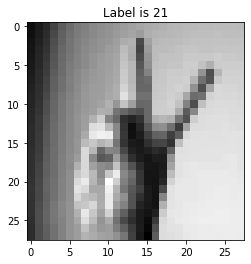

In [ ]:
show_img(5, data_test)

In [ ]:
#extract labels
y_train = data_train['label']
y_test = data_test['label']
del data_train['label']
del data_test['label']

In [ ]:
#Label Binarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = data_train.values
x_test = data_test.values

In [ ]:
#Normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
#reshape
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
#data augmentation
data_generator = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False,
)
data_generator.fit(x_train)

In [ ]:
#build model
model = Sequential(name="gestRec")
model.add(Conv2D(75,(3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2, padding='same'))
model.add(Conv2D(50,(3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2, padding='same'))
model.add(Conv2D(25,(3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=24, activation='softmax'))

In [ ]:
model

SyntaxError: ignored

In [ ]:
#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#set learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose = 1, factor=0.5, min_lr=0.00001)

In [ ]:
#train model
model.fit(data_generator.flow(x_train, y_train, batch_size=128), epochs=20, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

In [ ]:
#check final accuracy
model.evaluate(x_test, y_test)

In [ ]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if (predictions[i]>=9 or predictions[i]>=25):
        predictions[i] += 1
predictions[:4]

In [ ]:
#save model
model.save('my_coursera_hand_gesture-2.h5')

In [ ]:
import tensorflow as tf
pre_model = tf.keras.models.load_model("/content/my_coursera_hand_gesture-2.h5")
pre_model.save("saved_model")

In [ ]:
!pip install git+https://github.com/onnx/tensorflow-onnx

In [ ]:

#convert .H5 to .PB
!python -m tf2onnx.convert --saved-model 'saved_model/' --output tfmodel.onnx

In [ ]:
from IPython.display import Image
import tensorflow as tf

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

In [ ]:
#print(tf.__version__)